<a href="https://colab.research.google.com/github/dominguezeloy/data_science_portfolio/blob/main/05_Machine_Learning_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#empezamos importando las librerias que necesitamos
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Descargamos el archivo CSV y lo añadimos a este cuaderno, link:
https://www.kaggle.com/datasets/alelafe/rent-prices-spain/

In [9]:
#cargamos el data frame
df_precios = pd.read_csv ('/content/Barcelona_rent_price.csv')
df_precios.shape #comprobamos el numero de filas y columnas

(4622, 6)

In [10]:
df_precios.dtypes #tipos de variables

Year               int64
Trimester          int64
District          object
Neighbourhood     object
Average _rent     object
Price            float64
dtype: object

Necesitamos las coordenadas de los barrios, usamos el archivo anterior y hacemos una llamada API Geocoding de Geoapify para obtener coordenadas de los barrios. Para simplificar, lo he guardado en otro archivo: Barcelona_coordenadas.csv

In [11]:
df_coordenadas = pd.read_csv ('/content/Barcelona_coordenadas.csv')
df_coordenadas.shape #mostrar el numero de filas y columnas

(68, 3)

In [12]:
df_coordenadas.dtypes #tipos de variables

Neighbourhood     object
lat              float64
lon              float64
dtype: object

Con una columna en común podemos unir los dos archivos CSV para trabajar más fácilmente con un único archivo

In [13]:
df_precios = pd.read_csv("/content/Barcelona_rent_price.csv")
df_coordenadas = pd.read_csv("/content/Barcelona_coordenadas.csv")

df_final = pd.merge(df_precios, df_coordenadas, on="Neighbourhood")

df_final.to_csv("precios_con_coordenadas.csv", index=False)

Ahora tenemos un archivo que podemos descargar para reutilizar en el futuro.
Verificamos el DataFrame

In [14]:
df_final.shape #mostrar el numero de filas y columnas

(4530, 8)

In [15]:
df_final.dtypes #tipos de variables

Year               int64
Trimester          int64
District          object
Neighbourhood     object
Average _rent     object
Price            float64
lat              float64
lon              float64
dtype: object

Primero creamos una visualización de los precios en un mapa de dispersión usando la latitud y la longitud para posicionarlo en los ejes

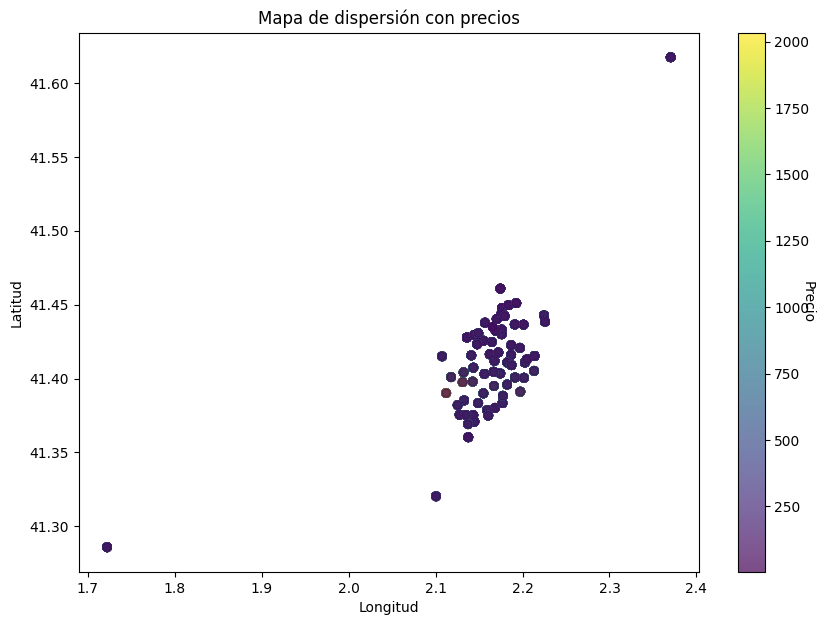

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(x=df_final['lon'], y=df_final['lat'], c=df_final['Price'], alpha=0.7)

cbar = plt.colorbar(scatter) #barra de colores
cbar.ax.set_ylabel('Precio', rotation=270)

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Mapa de dispersión con precios')

plt.show() #mostramos el gráfico

Por último, vamos a importar una nueva librería (folium) que nos permite ubicar cada elemento en el mapa de Barcelona

In [18]:
import folium

coordenadas_centro = [41.40372082670373, 2.173145613468125] #coordenadas de la sagrada familia
mapa = folium.Map(location=coordenadas_centro, zoom_start=12)

for lat, lon, precio in zip(df_final['lat'], df_final['lon'], df_final['Price']):
    folium.CircleMarker([lat, lon], radius=precio*0.01, color='blue', fill=True, fill_color='blue', fill_opacity=0.1).add_to(mapa)

display(mapa) #mostramos el mapa

Final de la primera parte